In [1]:
import pandas as pd
import seaborn as sns

iris = pd.read_csv("/Users/malemoreno/Documents/Fundamentos_de_Inf/Fundamentos_de_informatica/Ciencia_de_datos/iris_data.txt", sep = '\t')
#Leemos el dataset, esta separado por /t (tab)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

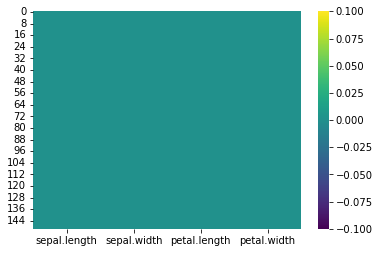

In [27]:
sns.heatmap(iris.isnull(), cmap='viridis') 
# No contiene datos nulos en ninguna de sus columnas 

In [2]:
# EXploramos los datos con info y describe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


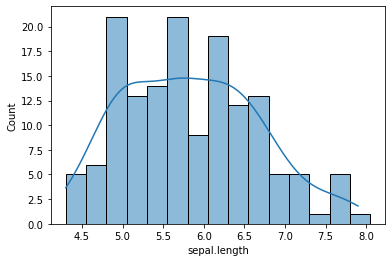

In [4]:
import matplotlib.pyplot as plt

g = sns.histplot(data = iris, x = "sepal.length", binwidth=0.25, kde = True)
plt.show()

#Graficamos un histograma sobre iris, sobre esa columna (x=...), binwidth= rangos en el que yo tomo los numeros


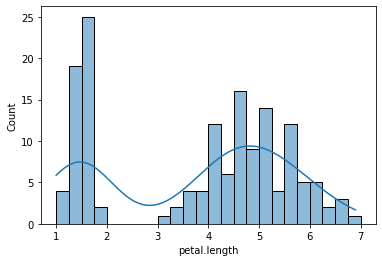

In [6]:
g = sns.histplot(data = iris, x = "petal.length", binwidth=0.25, kde = True)
plt.show()

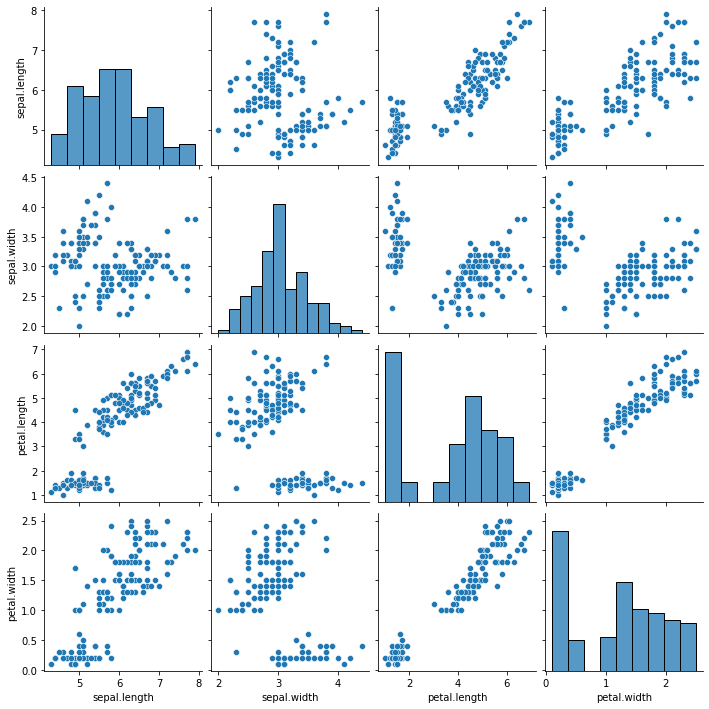

In [5]:
g = sns.pairplot(iris) # Graficamos todas las col contra todas las columnas
plt.show()

# ¿Qué información obtenes del gráfico?
# Correlatograma (relación entre dif variables)
# Tiene correlación si su pendiente es positiva, está concentrada y es constante (ex. petal.length)
# Cálculo entre ptos. se usa el Teorema de Pitágoras 

In [7]:
import sklearn

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(iris)

In [10]:
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans

k = 3  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(iris_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', n_clusters=3, random_state=123457)

In [ ]:
iris_escaleado

In [ ]:
iris_escaleado[:,2]
# Esto lo hago si solo quiero los datos de una columna

In [12]:
print(kmeans.labels_)
#labels: me permite saber a que grupo pertenecen los datos

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
print(kmeans.cluster_centers_)

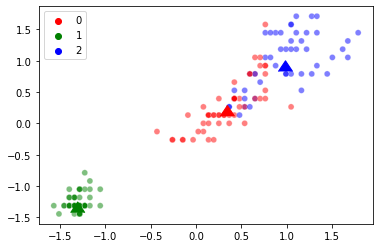

In [13]:
# Para entender mejor los resultados obtenidos grafiquemos la distribución de puntos,
# pintando cada punto según el color correspondiente al etiquetado:

import seaborn as sns

colores = ["red", "green", "blue"]

g = sns.scatterplot(x = iris_escaleado[:,2],
y = iris_escaleado[:, 3],
hue = kmeans.labels_,
palette = colores, alpha = 0.5)

g = sns.scatterplot(x = kmeans.cluster_centers_[:,2],
y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200)

In [14]:
print(kmeans.inertia_ )

140.96837895511078


In [15]:
# Calculá la inercia para distintos valores de k, desde 0 a 10, y almacenalos en un DataFrame

inercias = {}
def inercias_por_k(diccionario): 
    for i in range(1,11): 
        kmeans = KMeans(n_clusters = i, init='random', n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(iris_escaleado)
        diccionario[i] = kmeans.inertia_

inercias_por_k(inercias)
inercias 

{1: 600.0000000000001,
 2: 223.73200573676348,
 3: 140.96837895511078,
 4: 114.42970777082232,
 5: 91.15436807797661,
 6: 82.00448142316836,
 7: 72.65522408358466,
 8: 63.056244057155496,
 9: 54.96033206356742,
 10: 47.640624864060996}

In [17]:
df_inercias = pd.DataFrame(inercias.items(), columns=['K', 'inercia'])
df_inercias 

# Cuanto menor es la inercia, mejor es la separación de grupos 

,K,inercia
0,1,600.000000
1,2,223.732006
2,3,140.968379
3,4,114.429708
4,5,91.154368
5,6,82.004481
6,7,72.655224
7,8,63.056244
8,9,54.960332
9,10,47.640625


<AxesSubplot:xlabel='K', ylabel='inercia'>

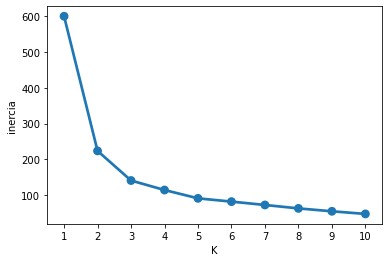

In [21]:
sns.pointplot(data = df_inercias , x = "K", y = "inercia")

# Regla del Codo
# El valor del grupo es donde cambia la pendiente
# Es confiable que divida los datos en 2 o 3 grupos 

In [22]:
# Para el Coeficiente de Silhouette
from sklearn.metrics import silhouette_samples, silhouette_score 

# Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)

# Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [26]:
# Generamos el gráfico

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

  #plt.savefig(path) --> para guardar las imagenes que generamos con los datos 

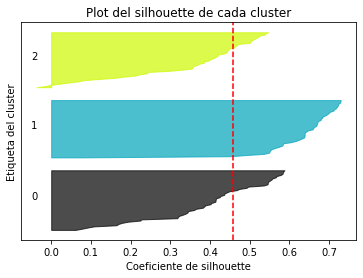

In [25]:
graficarSilhouette(k, kmeans.labels_, sample_silhouette_values, silhouette_avg)